# JaeHwan Shim
### *Lab Notebook from 2018.03 to 2018.04*

* <span style="color:gray">email: schinavro@gmail.com</span>
* <span style="color:gray">Tel: +82-10-2367-1713</span>

**Abstract**: $CrI_3$ is first ferromagnetic monolayer experimentally found. This is insulator and has inverse symmetry. With inverse symmetry and honeycomb structure of $CrI3$, Dirac corn occurs at $K$ point. Further more, its insulating property combined with Dirac corn makes it perfect candidate for Topological Insulator. Here, using *ab initio* with linear combination of atomic orbitals(lcao) method, we calculated ~~hope~~ that it is indeed topological insulator with ~~super big~~ unknown chern number. Further more, with 8% of compressive strain, antiferromagnetic order emerges in this system. Antiferromagnetic order recovers the time reversal symmetry and make it possible to define spin chern number. We also calculated spin chern number of $CrI_3$ and ~~hope~~ showed it has the spin Hall effect

dd

-----

<cite data-cite="4868037/GAM97X73"></cite><div class="cite2c-biblio"></div>

![](./images/cri3.png)

In [1]:
from ase.calculators.openmx.my_functions import getAtoms;cri3=getAtoms(a=7, m = [3,-3]);from ase.io import write; 
write('./images/cri3.png',cri3.repeat((2,2,1)),show_unit_cell=0.5,scale=30)

### *2018.03.30*
#### Motivation(Why)
## Introduction

 Recently, monolayer $CrI_3$ were successfully synthesized and showed compelling result that it has ferromagnetic order[2]. After the experimental result, theoretical paper based on *ab initio* calculation regarding its property depend on several conditions were reported. However, number of paper estimated its topological property. Topological properties can be easily expected from this material. Since, it forms a hexagonal structure, like graphene, with inverse symmetry, we can expect Dirac corn appears at $K$ point. Furthermore, Conditions for the topological insulator indeed requires an insulating property. Band calculation of $CrI_3$ shows it is an insulator ~~with bandgap 0.3.~~. From those facts, we are expecting CrI3 actually topological insulator.   
 
<!--
Bascially, Dirac corn occurs when an atom at site A see the other two atom B same. Graphene, for example, has a hexagonal lattice with two Carbon basis. Let's lable those two carbon as A and B. In the view of carbon A, it can not differenor sublattice, 
-->

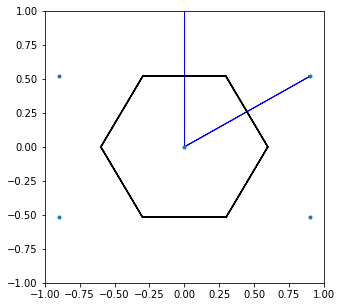

In [35]:
%matplotlib inline
from ase.calculators.openmx.band import Band;Band.plot_brillouin_2d(cri3)

#### Methods(How)
 Here, we used OpenMX calculator[3] that *ab initio* with linear combination of atomic orbitals(lcao) method, we calculated ~~hope~~ that it is indeed a topological insulator with ~~super big~~ unknown chern number. Further more, with 8% of compressive strain, antiferromagnetic order emerges in this system. Antiferromagnetic order recovers the time reversal symmetry and make it possible to define spin chern number. We also calculated spin chern number of $CrI_3$ and showed ~~hope~~ it showed  the spin Hall effect.First, we carefully relaxed Chrome tri-Iodine, and using least square fit method, we recovered it's symmetry and  shows crossing at $K$ point We report that this material could be a topological insulator with spin number... We also check the spin chern number of this material. we strain about 8% and it favors an antiferromagnetic order. We organaized parameters that I've used in this calculation.
 
Fixed parameter | Codes
---------------|------------
Energy cutoff | ```ecut=200``` $ Ha $
XC functional | ```xc='GGA-PBE'```
$k-$points    | ```kpts=(4,4,1) ```
Eigen solver  | ```eigensolver='Band'```
Mixing Type  | ```mixing_type='rmm-diis'```
maximum iteration | ```maxiter=300 ```
Convergence | ```convergence=```$1.0\times10^{-5} Ha$
Hubbard     | ```hubbard_u_values = {'Cr':{'1d':3.0}}```

<!--
Calculator name | ```calcName = openmx```
PBS Wall Time  | ```walltime="3:00:00:00"```
PBS # of process| ```processes=20```
scf.stress.tensor | ```on```
-->

We begin with comparing energy difference between ferromagnetic order and antiferro-magnetic order. 

In [9]:
import numpy as np
#latticeConsts = np.linspace(6.2,8.4,5)
latticeConsts = [6.867]
charges = [0.0]
#charges = np.linspace(-0.2,0.2,5)
M=['Cr','Mo','W']
X=['I','Br','Cl']
#structures = [[3,3],[3,-3],[3,3,-3,-3],[-3,3,3,-3]] #F, AF, stAF, zgAF
structures = [[3,3],[3,-3]]
atoms = []
alen = len(latticeConsts)
clen = len(charges)
mlen = len(structures)
energies = np.zeros((len(latticeConsts),len(charges),len(structures)))
for a in latticeConsts:
    for charge in charges:
        for m in structures:
            atoms.append(getAtoms(a=a,charge=charge, m = m))

In [14]:
from ase.calculators.openmx.my_functions import relabel
new_atoms = []
for atom in atoms:
    new_atoms.append(relabel(atom, label = 'org'))
atoms = new_atoms[:]

/group1/schinavro/crI3/openMX/symCrIF
/group1/schinavro/crI3/openMX/symCrIAF


## Optimization

The problem of OpenMX's method on automated process cell and optimization, you can not specify the features to what you want to. For example, It does not support cell optimization using only on xx and yy stress tensor.  

Using UnitCellFilter method, Optimize the positions of atoms and the size of the cell simultiniously. See the document below.
https://wiki.fysik.dtu.dk/ase/ase/constraints.html

In [13]:
atoms_opt = []
for atom in atomsE:
    atoms_opt.append(relabel(atom, 'opt'))

/group1/schinavro/crI3/openMX/optCrIF
/group1/schinavro/crI3/openMX/optCrIAF


In [15]:
from ase.calculators.openmx.my_functions import Functions
fun = Functions(subversive = False, readmode = True)
getE = fun.getE
#atomsE[0]=getE(atoms[0])
#atoms[0].get_potential_energy()
atomsE = []
from joblib import Parallel, delayed
atomsE = Parallel(n_jobs=2)(delayed(getE)(atom) for atom in atoms)

/group1/schinavro/crI3/openMX/symCrIF.outexist!
/group1/schinavro/crI3/openMX/symCrIAF.outexist!


In [5]:
from ase.calculators.openmx.my_functions import optimize
#opt_atom = optimize(atoms[0])
#atoms[0].calc.read_results()
opt_atoms =[]
from joblib import Parallel, delayed
opt_atoms = Parallel(n_jobs=2)(delayed(optimize)(atom) for atom in atoms_opt)
#opt_atom = optimize(atoms[0])

[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
      Step     Time          Energy         fmax
BFGS:    0 21:40:08    -6940.843861        0.0371
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
      Step     Time          Energy         fmax
BFGS:    0 21:40:24    -6940.892343        0.0368
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
BFGS:    1 21:45:23    -6940.892363        0.0346
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
BFGS:    1 21:46:26    -6940.843892        0.0349
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
[0, 1, 8, 9]
BFGS:    2 21:52:33    -6940.892472        0.0419
[0, 1, 8, 9]
[0, 1, 8, 9]
[0

## Results
#### Results(What)

#### Prospects(If)

## Part I

1. Optimization
2. Band Structure + DOS 
3. SOC 
4. Band Diff 

## Part II
1. Tight Binding 
2. Wannier + Chern
3. Compressive strain
4. Spin Chern

In [11]:
opt_atoms[0].calc.label

'/group1/schinavro/crI3/openMX/opt_2CrIF'

In [5]:
##LOADING!
def load_atoms(atom):
    from ase.io.trajectory import Trajectory
    label = atom.calc.label
    new_atom = Trajectory(label + '.traj','r')[-1]
    new_atom.calc = atom.calc
    return new_atom
atoms_sym = []
for atom in opt_atoms:
    atoms_sym.append(load_atoms(relabel(atom,'opt')))

## Symmetrical line fitting

least square fit. 

In [7]:
from ase.calculators.openmx.my_functions import curve_fitting
#sym_atom = curve_fitting(atoms_opt[1])
sym_atoms = []
from joblib import Parallel, delayed
sym_atoms = Parallel(n_jobs=2)(delayed(curve_fitting)(atom) for atom in atoms_sym)
#sym_atoms = curve_fitting(atoms_opt)

Optimization terminated successfully.
         Current function value: 0.042397
         Iterations: 159
         Function evaluations: 285
Optimization terminated successfully.
         Current function value: 0.026234
         Iterations: 298
         Function evaluations: 515


## Recalculation using symmtrized atoms

In [10]:
atoms_symE =[]
for atom in sym_atoms:
    atoms_symE.append(relabel(atom, 'sym'))

/group1/schinavro/crI3/openMX/symCrIF
/group1/schinavro/crI3/openMX/symCrIAF


In [14]:
print(atoms_symE[1].calc,atoms_symE[0].positions)

<ase.calculators.openmx.openmx.OpenMX object at 0x2b0a4c0389e8> [[  0.00000000e+00   3.96466430e+00   9.90350000e+00]
 [  3.43350000e+00   1.98233215e+00   9.90350000e+00]
 [  1.19199924e+00   2.06357691e+00   1.15455565e+01]
 [  4.48389035e+00   5.13169525e-04   1.15455565e+01]
 [  4.62461041e+00   3.88290636e+00   1.15455565e+01]
 [  2.24150076e+00   3.88341953e+00   8.26144352e+00]
 [ -1.05039035e+00   5.94648328e+00   8.26144352e+00]
 [ -1.19111041e+00   2.06409008e+00   8.26144352e+00]]


In [19]:
symE_atoms = []
atoms_symE = []
for atom in sym_atoms:
    symE_atoms.append(relabel(atom, 'sym'))
atoms_symE = Parallel(n_jobs=2)(delayed(getE)(atom) for atom in symE_atoms)
#[ 6.867       1.0470908   0.34696889  0.58316308]
#[ 6.867       1.04719755  0.34818042  0.58347442]

/group1/schinavro/crI3/openMX/symCrIF
/group1/schinavro/crI3/openMX/symCrIAF
/group1/schinavro/crI3/openMX/symCrIF.outexist!
/group1/schinavro/crI3/openMX/symCrIAF.outexist!


In [21]:
print(atoms_symE[0].calc.results['energy'],atoms_symE[1].calc.results['energy'])

-6940.892442312081 -6940.843612762931


## Get Final Structures

In [13]:
def getMinEAtom(atoms):
    final_structures = []
    E =[]
    for atom in atoms:
        E.append(atom.calc.results['energy'])
    final_structures.append(atoms[np.argmin(E)])
    return final_structures
#minAtom = getMinEAtom(atoms_symE)
minAtoms = getMinEAtom(sym_atoms)

## Reciprocal Space with K-path

<IPython.core.display.Javascript object>


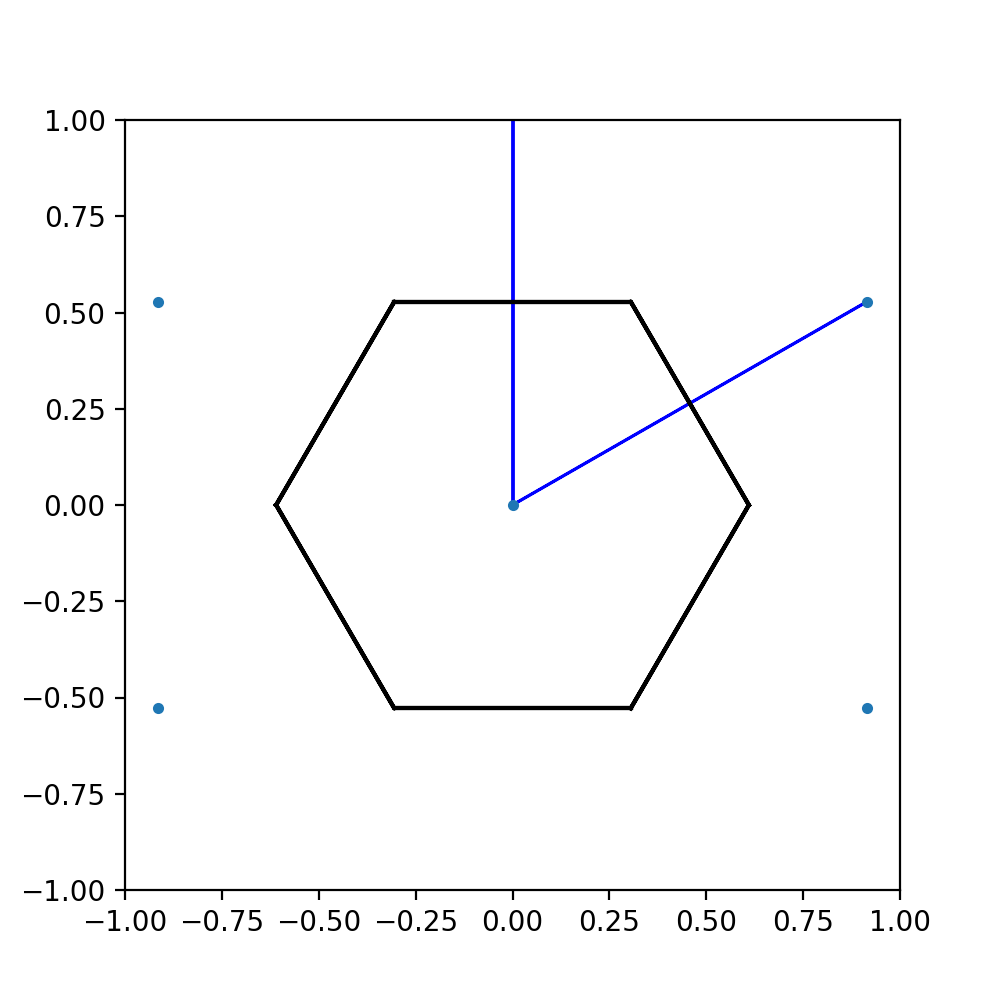

In [5]:
%matplotlib notebook
from ase.calculators.openmx.band import Band
Band.plot_brillouin_2d(minAtom)

In [6]:
def get_reciprocal(a):
            cr = np.array([np.cross(a[1], a[2]), np.cross(a[2], a[0]),
                           np.cross(a[0], a[1])])
            crd = np.array([np.dot(a[0], np.cross(a[1], a[2])),
                            np.dot(a[1], np.cross(a[2], a[0])),
                            np.dot(a[2], np.cross(a[0], a[1]))])
            return 2*np.pi*cr/crd
b = get_reciprocal(minAtom.cell)
from scipy.spatial import Voronoi
b1 = b[0]
b2 = b[1]
b3 = b[2]
points = []
for M1 in range(-1, 2):
    for M2 in range(-1, 2):
        for M3 in range(-1,2):
            points.append(M1*b1+M2*b2+M3*b3)
vor = Voronoi(points)
sym_p = vor.vertices
sym_p

array([[ -3.04994190e-01,   5.28265433e-01,  -1.58610221e-01],
       [ -6.09988380e-01,   3.33066907e-16,  -1.58610221e-01],
       [ -6.09988380e-01,  -1.05653087e+00,  -1.58610221e-01],
       [ -3.04994190e-01,  -5.28265433e-01,  -1.58610221e-01],
       [  3.04994190e-01,  -5.28265433e-01,  -1.58610221e-01],
       [ -6.09988380e-01,   3.33066907e-16,   1.58610221e-01],
       [ -3.04994190e-01,   5.28265433e-01,   1.58610221e-01],
       [ -6.09988380e-01,  -1.05653087e+00,   1.58610221e-01],
       [ -3.04994190e-01,  -5.28265433e-01,   1.58610221e-01],
       [  3.04994190e-01,  -5.28265433e-01,   1.58610221e-01],
       [  6.09988380e-01,  -1.47077902e-16,  -1.58610221e-01],
       [  6.09988380e-01,  -1.47077902e-16,   1.58610221e-01],
       [  3.04994190e-01,   5.28265433e-01,  -1.58610221e-01],
       [  3.04994190e-01,   5.28265433e-01,   1.58610221e-01],
       [  6.09988380e-01,   1.05653087e+00,  -1.58610221e-01],
       [  6.09988380e-01,   1.05653087e+00,   1.5861022

In [11]:
sym_p[-4][2]=0.
kpath = np.array([[0.,0.,0.],sym_p[-4][:],b2[:]/2,[0.,0.,0.]])
kpath

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.30499419,  0.52826543,  0.        ],
       [ 0.        ,  0.52826543,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [28]:
b

array([[ 0.91498257,  0.52826543, -0.        ],
       [ 0.        ,  1.05653087,  0.        ],
       [ 0.        , -0.        ,  0.31722044]])

<IPython.core.display.Javascript object>


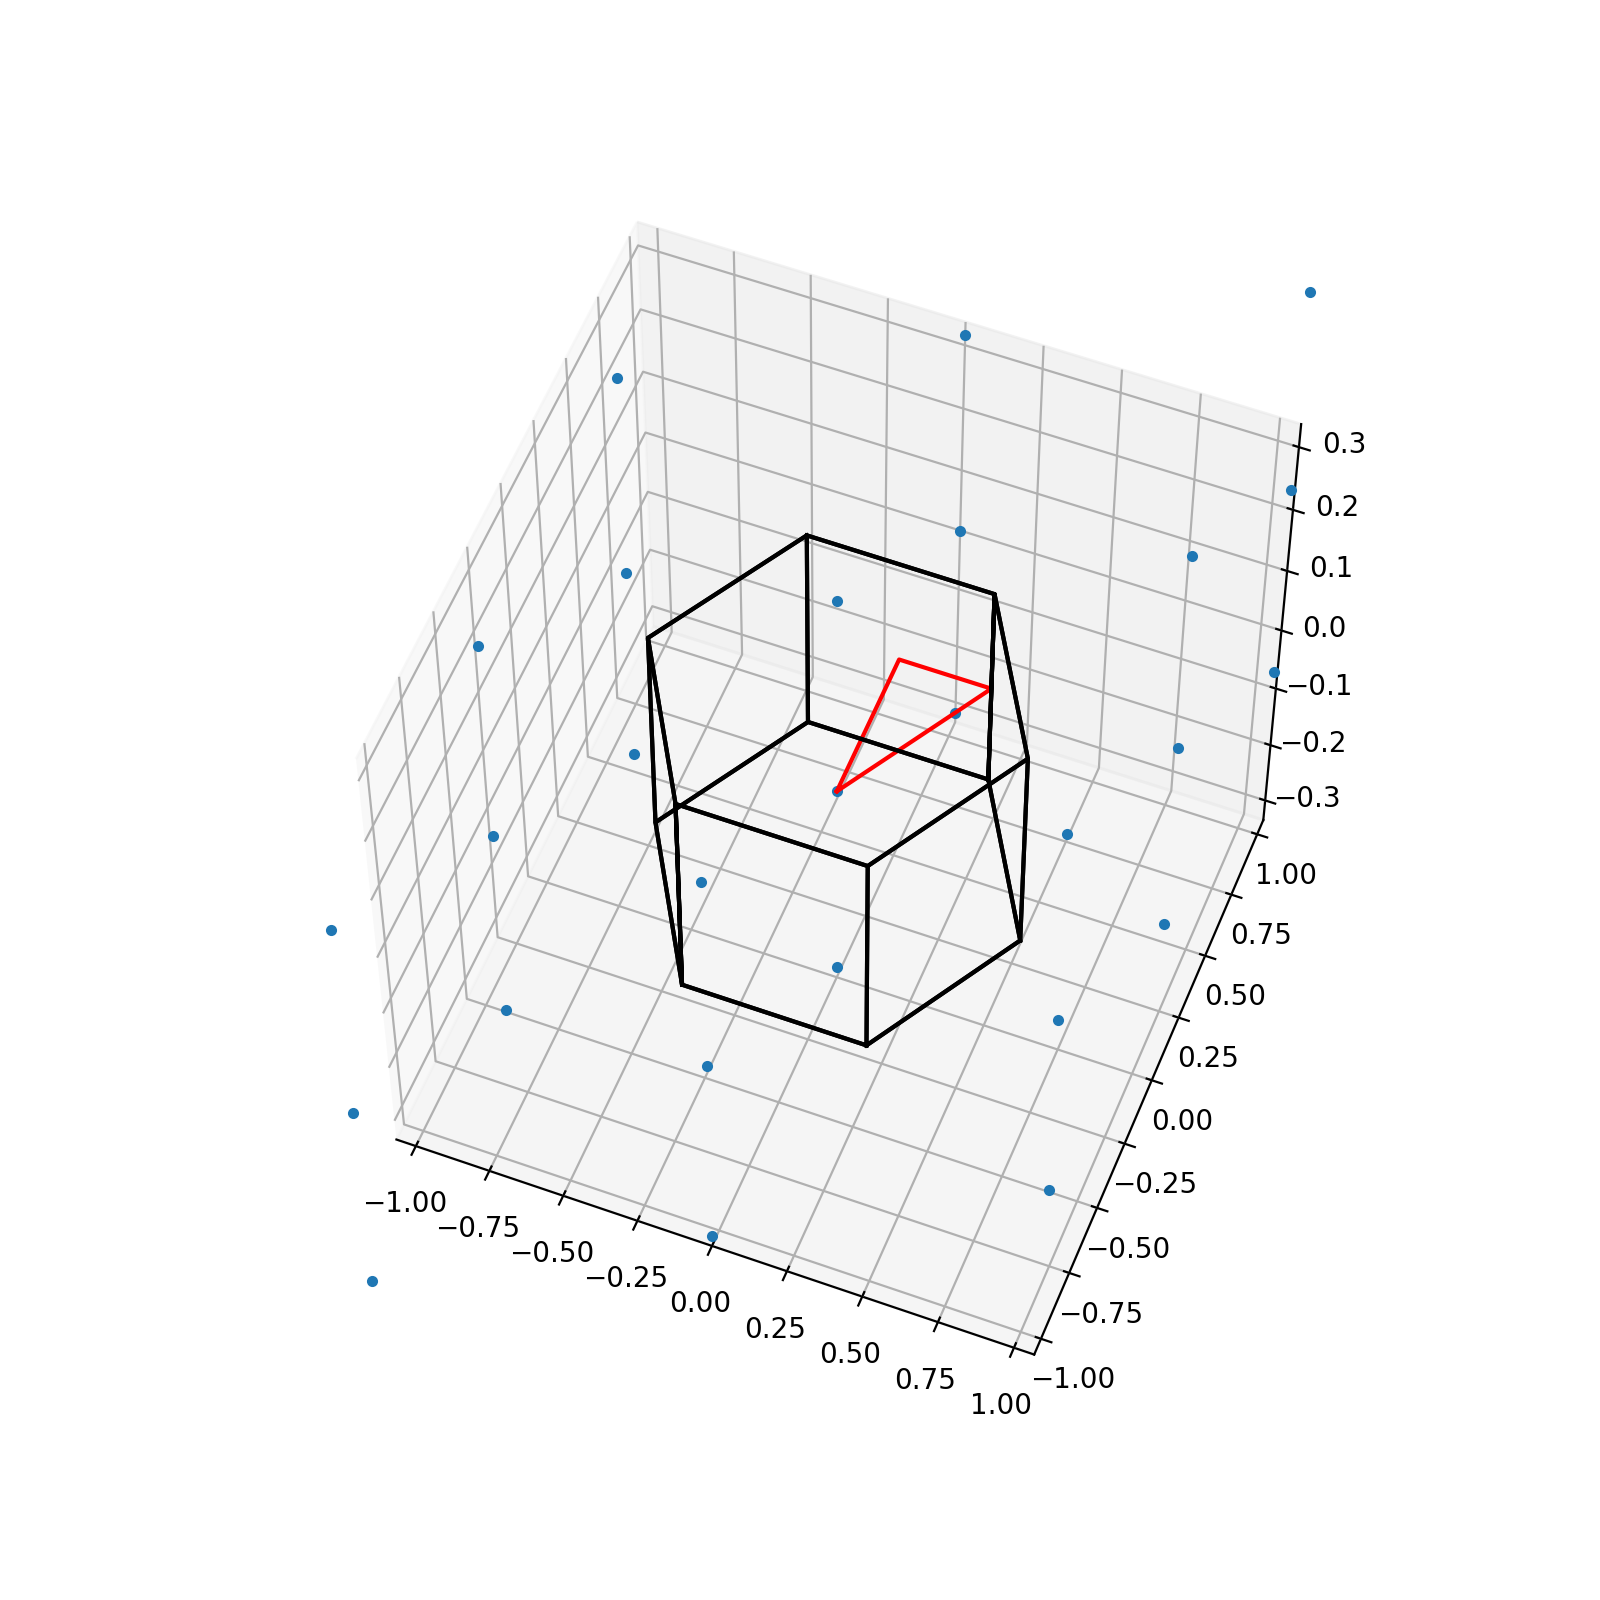

In [12]:
%matplotlib notebook
from ase.calculators.openmx.band import Band
Band.plot_brillouin_3d(minAtom, kpath = kpath)

## Finding Scaled reciprocal vector

Since, $$ b * M = G $$


In [46]:
from numpy.linalg import inv
scaled_kpath = np.dot(inv(b.transpose()),kpath.transpose())
scaled_kpath.transpose()

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.33333333,  0.33333333,  0.        ],
       [ 0.        ,  0.5       ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [11]:
import numpy as np
band_path=np.array([[ 0.        ,  0.        ,  0.        ],
       [ 0.33333333,  0.33333333,  0.        ],
       [ 0.        ,  0.5       ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

## Energy Band

In [21]:
from ase.units import Ha
opt_band = []
for atom in atomsE:
    opt_band.append(band_setting(relabel(atom,'bnd'),band_path,sym))

/group1/schinavro/crI3/openMX/bndCrIF
/group1/schinavro/crI3/openMX/bndCrIAF


In [9]:
band_path = np.transpose(scaled_kpath)
sym = ['g','K','M','g']
#print(bp)
def get_kpath(kpath,sym):
    band_kpath=[]
    p = kpath
    s = sym
    for i in range(len(p)-1): 
        band_kpath.append({'kpts':20,
                           'start_point':tuple(p[i]),
                           'end_point':tuple(p[i+1]),
                           'path_symbols':(sym[i],sym[i+1])})
    return band_kpath

def band_setting(atoms,kpath,sym):
    new_atom = atoms
    new_atom.calc.set(band_dispersion = True, band_kpath= get_kpath(kpath,sym),energy_cutoff=300*Ha)
    return new_atom
#print(get_kpath(bp,sym))
atoms_band = []
#for atom in minAtoms:
#    atoms_band.append(band_setting(relabel(atom,'bnd'),band_path,sym))

In [83]:
atoms_band[0].get_potential_energy()

-6940.878079782776

In [84]:
band_atoms =[]
band_atoms.append(atoms_band[0])

In [ ]:
band_atoms =[]
band_atoms = Parallel(n_jobs=2)(delayed(getE)(atom) for atom in atoms_band)

<IPython.core.display.Javascript object>


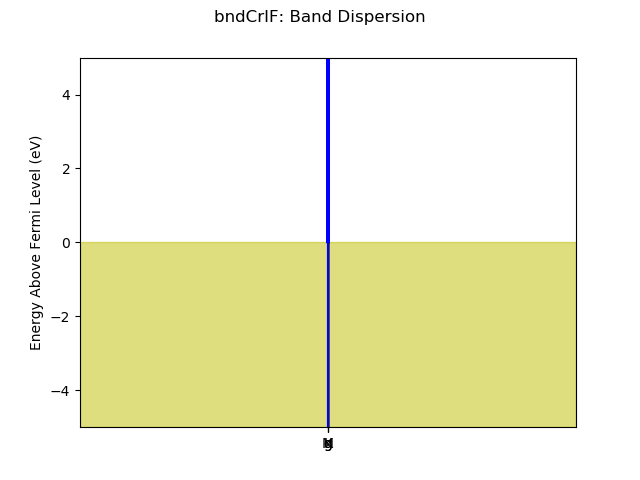

(<matplotlib.figure.Figure at 0x2b522359fba8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b522c64f5c0>]], dtype=object))

In [22]:
%matplotlib notebook
from ase.calculators.openmx.band import Band
band = Band(opt_band[0].calc)
band.get_band()

## Density of States

In [ ]:
def dos_setting(atoms):
    new_atom = atoms
    new_atom.calc.set(dos_erange=(-5,5), band_kpath= get_kpath(kpath,sym))
    return new_atom

## Spin Orbit Coupling

In [ ]:
def soc_setting(atoms,kpath,sym):
    new_atom = atoms
    new_atom.calc.set(dos_erange=(-5,5), band_kpath= get_kpath(kpath,sym))
    return new_atom